# Importing Dependencies

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, PowerTransformer 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from xgboost import XGBRegressor
import xgboost as xgb
import joblib

%matplotlib inline


# Loading the Data

In [2]:
dataset = pd.read_csv('CO2_Emissions_Canada.csv')
df = dataset[['Engine Size(L)', 'Cylinders', 'Transmission', 'Fuel Type','Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)', 'Fuel Consumption Comb (mpg)','CO2 Emissions(g/km)']]

# Data Preprocessing

In [3]:
df.columns

Index(['Engine Size(L)', 'Cylinders', 'Transmission', 'Fuel Type',
       'Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)',
       'Fuel Consumption Comb (L/100 km)', 'Fuel Consumption Comb (mpg)',
       'CO2 Emissions(g/km)'],
      dtype='object')

In [4]:
# changing columns name for better use
df.rename(columns={
    'Engine Size(L)': 'Engine_Size_L',
    'Cylinders': 'Cylinders',
    'Transmission': 'Transmission',
    'Fuel Type': 'Fuel_Type',
    'Fuel Consumption City (L/100 km)': 'Fuel_Consumption_City_L_per_100km',
    'Fuel Consumption Hwy (L/100 km)': 'Fuel_Consumption_Hwy_L_per_100km',
    'Fuel Consumption Comb (L/100 km)': 'Fuel_Consumption_Comb_L_per_100km',
    'Fuel Consumption Comb (mpg)': 'Fuel_Consumption_Comb_mpg',
    'CO2 Emissions(g/km)': 'CO2_Emissions_g_per_km'
}, inplace=True)

# Let's check the updated column names
print(df.columns)

Index(['Engine_Size_L', 'Cylinders', 'Transmission', 'Fuel_Type',
       'Fuel_Consumption_City_L_per_100km', 'Fuel_Consumption_Hwy_L_per_100km',
       'Fuel_Consumption_Comb_L_per_100km', 'Fuel_Consumption_Comb_mpg',
       'CO2_Emissions_g_per_km'],
      dtype='object')


/tmp/ipykernel_3900/3427858022.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={


In [5]:
# Display the first few rows of the DataFrame
print("First 5 rows of the DataFrame:")
print(df.head())

# Get a concise summary of the DataFrame, including data types and non-null values
print("\nDataFrame Info:")
print(df.info())

# Check for missing values in each column
print("\nMissing Values per Column:")
print(df.isnull().sum())

# Get descriptive statistics for numerical columns
print("\nDescriptive Statistics for Numerical Columns:")
print(df.describe())

# Get unique values and their counts for categorical columns
print("\nUnique Values and Counts for 'Transmission' Column:")
print(df['Transmission'].value_counts())

print("\nUnique Values and Counts for 'Fuel_Type' Column:")
print(df['Fuel_Type'].value_counts())

First 5 rows of the DataFrame:
   Engine_Size_L  Cylinders Transmission Fuel_Type  \
0            2.0          4          AS5         Z   
1            2.4          4           M6         Z   
2            1.5          4          AV7         Z   
3            3.5          6          AS6         Z   
4            3.5          6          AS6         Z   

   Fuel_Consumption_City_L_per_100km  Fuel_Consumption_Hwy_L_per_100km  \
0                                9.9                               6.7   
1                               11.2                               7.7   
2                                6.0                               5.8   
3                               12.7                               9.1   
4                               12.1                               8.7   

   Fuel_Consumption_Comb_L_per_100km  Fuel_Consumption_Comb_mpg  \
0                                8.5                         33   
1                                9.6                         29  

Correlation Matrix:
                                   Engine_Size_L  Cylinders  \
Engine_Size_L                           1.000000   0.927653   
Cylinders                               0.927653   1.000000   
Fuel_Consumption_City_L_per_100km       0.831379   0.800702   
Fuel_Consumption_Hwy_L_per_100km        0.761526   0.715252   
Fuel_Consumption_Comb_L_per_100km       0.817060   0.780534   
Fuel_Consumption_Comb_mpg              -0.757854  -0.719321   
CO2_Emissions_g_per_km                  0.851145   0.832644   

                                   Fuel_Consumption_City_L_per_100km  \
Engine_Size_L                                               0.831379   
Cylinders                                                   0.800702   
Fuel_Consumption_City_L_per_100km                           1.000000   
Fuel_Consumption_Hwy_L_per_100km                            0.948180   
Fuel_Consumption_Comb_L_per_100km                           0.993810   
Fuel_Consumption_Comb_mpg                  

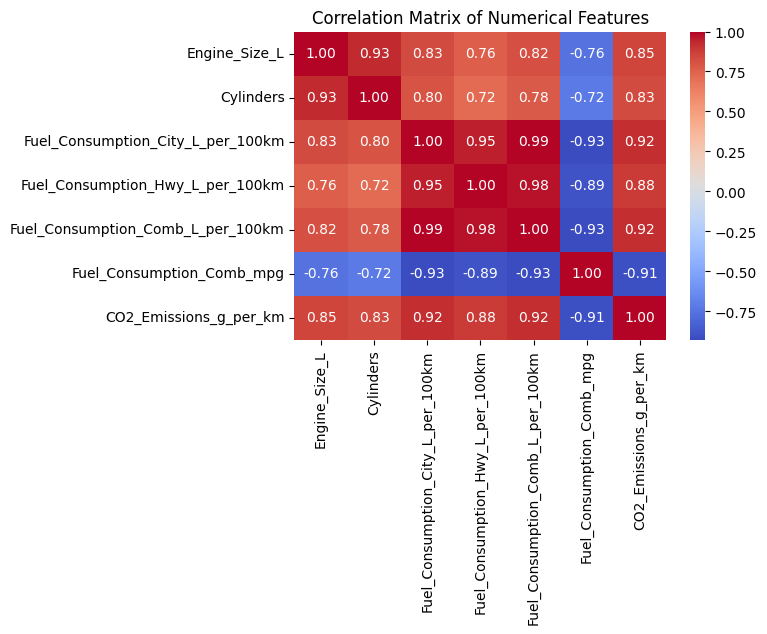

In [6]:
# Calculating the correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# printing the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(6,4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.show()

Dropping Fuel_Consumption_City_L_per_100km, Fuel_Consumption_Hwy_L_per_100km and  Fuel_Consumption_Comb_mpg  

In [7]:
df.drop(columns=[
    'Fuel_Consumption_City_L_per_100km',
    'Fuel_Consumption_Hwy_L_per_100km',
    'Fuel_Consumption_Comb_mpg'
], inplace=True)

/tmp/ipykernel_3900/2658008730.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=[


In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 6 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Engine_Size_L                      7385 non-null   float64
 1   Cylinders                          7385 non-null   int64  
 2   Transmission                       7385 non-null   object 
 3   Fuel_Type                          7385 non-null   object 
 4   Fuel_Consumption_Comb_L_per_100km  7385 non-null   float64
 5   CO2_Emissions_g_per_km             7385 non-null   int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 346.3+ KB
None


In [9]:
# Check the number of rows before removing duplicates
print(f"Number of rows before removing duplicates: {len(df)}")

# Remove duplicate rows, keeping the first occurrence by default
df.drop_duplicates(inplace=True)

# Check the number of rows after removing duplicates
print(f"Number of rows after removing duplicates: {len(df)}")


Number of rows before removing duplicates: 7385
Number of rows after removing duplicates: 3934


/tmp/ipykernel_3900/4250846404.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


In [10]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 3934 entries, 0 to 7384
Data columns (total 6 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Engine_Size_L                      3934 non-null   float64
 1   Cylinders                          3934 non-null   int64  
 2   Transmission                       3934 non-null   object 
 3   Fuel_Type                          3934 non-null   object 
 4   Fuel_Consumption_Comb_L_per_100km  3934 non-null   float64
 5   CO2_Emissions_g_per_km             3934 non-null   int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 215.1+ KB
None


In [11]:
# Perform one-hot encoding on 'Transmission'
df = pd.get_dummies(df, columns=['Transmission'], prefix='Transmission', drop_first=True)

# Perform one-hot encoding on 'Fuel_Type'
df = pd.get_dummies(df, columns=['Fuel_Type'], prefix='Fuel_Type', drop_first=True)


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3934 entries, 0 to 7384
Data columns (total 34 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Engine_Size_L                      3934 non-null   float64
 1   Cylinders                          3934 non-null   int64  
 2   Fuel_Consumption_Comb_L_per_100km  3934 non-null   float64
 3   CO2_Emissions_g_per_km             3934 non-null   int64  
 4   Transmission_A4                    3934 non-null   bool   
 5   Transmission_A5                    3934 non-null   bool   
 6   Transmission_A6                    3934 non-null   bool   
 7   Transmission_A7                    3934 non-null   bool   
 8   Transmission_A8                    3934 non-null   bool   
 9   Transmission_A9                    3934 non-null   bool   
 10  Transmission_AM5                   3934 non-null   bool   
 11  Transmission_AM6                   3934 non-null   bool   
 1

In [13]:
# Sum the boolean columns for Transmission types
transmission_counts = df[[col for col in df.columns if col.startswith('Transmission_')]].sum()

# Identify rare transmission types (appearing less than 20 times)
rare_transmissions = transmission_counts[transmission_counts < 10].index

# Drop the columns corresponding to rare transmission types
df.drop(columns=rare_transmissions, inplace=True)

# Do the same for Fuel Types
fuel_type_counts = df[[col for col in df.columns if col.startswith('Fuel_Type_')]].sum()
rare_fuel_types = fuel_type_counts[fuel_type_counts < 10].index
df.drop(columns=rare_fuel_types, inplace=True)

# Check the updated number of columns
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 3934 entries, 0 to 7384
Data columns (total 29 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Engine_Size_L                      3934 non-null   float64
 1   Cylinders                          3934 non-null   int64  
 2   Fuel_Consumption_Comb_L_per_100km  3934 non-null   float64
 3   CO2_Emissions_g_per_km             3934 non-null   int64  
 4   Transmission_A4                    3934 non-null   bool   
 5   Transmission_A5                    3934 non-null   bool   
 6   Transmission_A6                    3934 non-null   bool   
 7   Transmission_A7                    3934 non-null   bool   
 8   Transmission_A8                    3934 non-null   bool   
 9   Transmission_A9                    3934 non-null   bool   
 10  Transmission_AM6                   3934 non-null   bool   
 11  Transmission_AM7                   3934 non-null   bool   
 1

# Splitting Features and Target  

In [14]:
X = df.drop('CO2_Emissions_g_per_km', axis=1)
y = df['CO2_Emissions_g_per_km']

# Now, let's visualize the distribution of the numerical features in X_train

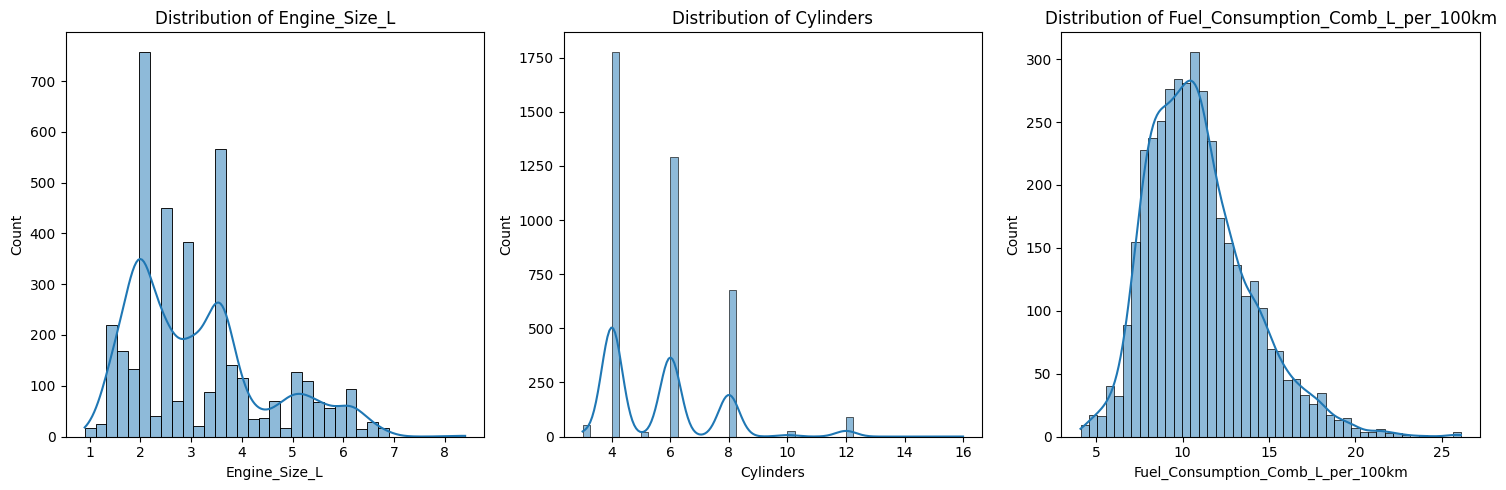

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = ['Engine_Size_L', 'Cylinders', 'Fuel_Consumption_Comb_L_per_100km']

plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_cols):
    plt.subplot(1, 3, i + 1)
    sns.histplot(X[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

Fuel_Consumption_Comb_L_per_100km looks most normally distributed so no changes to it. Same goes for Cylinders \
But for Engine_Size_L , I am going to use PowerTransformer(method='yeo-johnson') to make data more gaussian like 

In [16]:
pt = PowerTransformer(method='yeo-johnson')
X['Engine_Size_L_transformed'] = pt.fit_transform(X[['Engine_Size_L']])

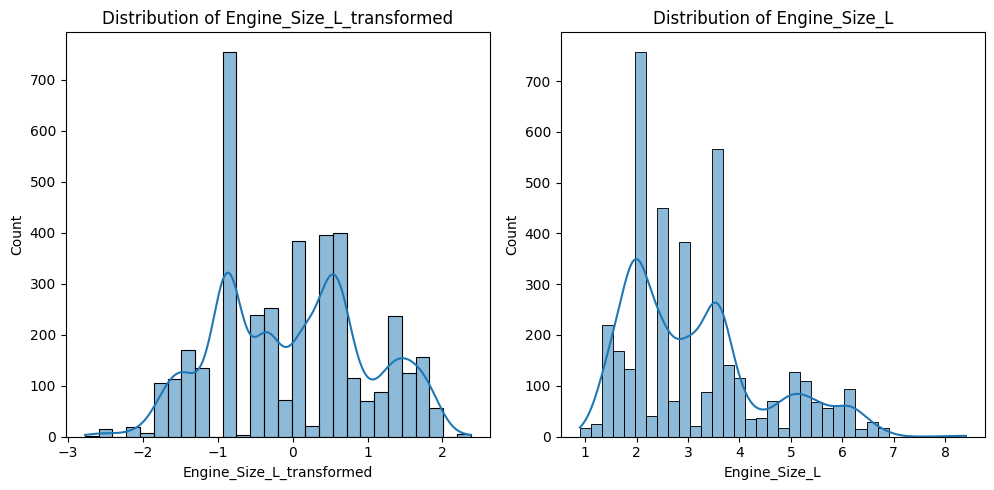

In [17]:
# rechecking the distributions

numerical_cols = ['Engine_Size_L_transformed', 'Engine_Size_L']

plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_cols):
    plt.subplot(1, 3, i + 1)
    sns.histplot(X[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

As we can see the Engine_Size_L_transformed column is much more normally distributed than the Engine_Size_L column 

In [18]:
# Drop the original 'Engine_Size_L' column
X.drop('Engine_Size_L', axis=1, inplace=True)

In [19]:
# Rename the transformed column back to 'Engine_Size_L' for simplicity
X.rename(columns={'Engine_Size_L_transformed': 'Engine_Size_L'}, inplace=True)

In [30]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3934 entries, 0 to 7384
Data columns (total 28 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Cylinders                          3934 non-null   int64  
 1   Fuel_Consumption_Comb_L_per_100km  3934 non-null   float64
 2   Transmission_A4                    3934 non-null   bool   
 3   Transmission_A5                    3934 non-null   bool   
 4   Transmission_A6                    3934 non-null   bool   
 5   Transmission_A7                    3934 non-null   bool   
 6   Transmission_A8                    3934 non-null   bool   
 7   Transmission_A9                    3934 non-null   bool   
 8   Transmission_AM6                   3934 non-null   bool   
 9   Transmission_AM7                   3934 non-null   bool   
 10  Transmission_AM8                   3934 non-null   bool   
 11  Transmission_AS10                  3934 non-null   bool   
 1

# Splitting the train and test data

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

# Feature Scaling 

In [21]:
scaler = StandardScaler()
# fit the scaler on train data
scaler.fit(X_train)

#transform both train and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# Model Training and Evaluation
First we will evaluate Linear Regression and then some other models like Ridge, Lasso

In [22]:
# 1. Linear Regression 
linear_model = LinearRegression()

# 2. Train the model
linear_model.fit(X_train, y_train)

# 3. Prediction on test data
y_pred_linear = linear_model.predict(X_test)

# 4. Evaluate the model 
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))
mae_linear = mean_absolute_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

# 5. Create the initial scorecard DataFrame
scorecard = pd.DataFrame(
    {
        'Model':['Linear Regression'],
        'MSE': [mse_linear],
        'RMSE': [rmse_linear],
        'MAE': [mae_linear],
        'R-squared': [r2_linear]
    }
)

print("Linear Regression Model Evaluation :")
print(scorecard)

Linear Regression Model Evaluation :
               Model        MSE      RMSE       MAE  R-squared
0  Linear Regression  40.005948  6.325026  3.494043   0.988982


In [23]:
# 1. Ridge Regression 
ridge_model = Ridge(random_state=2)

# 2. Train the model
ridge_model.fit(X_train, y_train)

# 3. Prediction on test data
y_pred_ridge = ridge_model.predict(X_test)

# 4. Evaluate the model 
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

# 5. Add Ridge results to the scorecard
ridge_row = pd.DataFrame({
    'Model': ['Ridge Regression (L2)'],
    'MSE': [mse_ridge],
    'RMSE': [rmse_ridge],
    'MAE': [mae_ridge],
    'R-squared': [r2_ridge]
})

scorecard = pd.concat([scorecard, ridge_row], ignore_index=True)

print(scorecard)

                   Model        MSE      RMSE       MAE  R-squared
0      Linear Regression  40.005948  6.325026  3.494043   0.988982
1  Ridge Regression (L2)  40.766851  6.384892  3.563365   0.988772


In [24]:
# 1. Lasso Regression 
lasso_model = Lasso(alpha=0.1,random_state=2)

# 2. Train the model
lasso_model.fit(X_train, y_train)

# 3. Prediction on test data
y_pred_lasso = lasso_model.predict(X_test)

# 4. Evaluate the model 
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

# 5. Add Lasso results to the scorecard
lasso_row = pd.DataFrame({
    'Model': ['Lasso Regression (L1)'],
    'MSE': [mse_lasso],
    'RMSE': [rmse_lasso],
    'MAE': [mae_lasso],
    'R-squared': [r2_lasso]
})

scorecard = pd.concat([scorecard, lasso_row], ignore_index=True)

print(scorecard)

                   Model        MSE      RMSE       MAE  R-squared
0      Linear Regression  40.005948  6.325026  3.494043   0.988982
1  Ridge Regression (L2)  40.766851  6.384892  3.563365   0.988772
2  Lasso Regression (L1)  51.626830  7.185181  3.976397   0.985781


In [25]:
# 1. Elastic Net Regression 
elastic_net_model = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)

# 2. Train the model
elastic_net_model.fit(X_train, y_train)

# 3. Prediction on test data
y_pred_elastic = elastic_net_model.predict(X_test)

# 4. Evaluate the model 
mse_elastic = mean_squared_error(y_test, y_pred_elastic)
rmse_elastic = np.sqrt(mean_squared_error(y_test, y_pred_elastic))
mae_elastic = mean_absolute_error(y_test, y_pred_elastic)
r2_elastic = r2_score(y_test, y_pred_elastic)

# 5. Add Elastic Net results to the scorecard
elastic_net_row = pd.DataFrame({
    'Model': ['Elastic Net Regression'],
    'MSE': [mse_elastic],
    'RMSE': [rmse_elastic],
    'MAE': [mae_elastic],
    'R-squared': [r2_elastic]
})
scorecard = pd.concat([scorecard, elastic_net_row], ignore_index=True)

print(scorecard)

                    Model         MSE       RMSE       MAE  R-squared
0       Linear Regression   40.005948   6.325026  3.494043   0.988982
1   Ridge Regression (L2)   40.766851   6.384892  3.563365   0.988772
2   Lasso Regression (L1)   51.626830   7.185181  3.976397   0.985781
3  Elastic Net Regression  211.023218  14.526638  9.469020   0.941880


# Visualizing the Scorecard

/tmp/ipykernel_3900/4125982353.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Value', y='Model', data=subset, ax=ax, palette='viridis')
/tmp/ipykernel_3900/4125982353.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Value', y='Model', data=subset, ax=ax, palette='viridis')
/tmp/ipykernel_3900/4125982353.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Value', y='Model', data=subset, ax=ax, palette='viridis')
/tmp/ipykernel_3900/4125982353.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated a

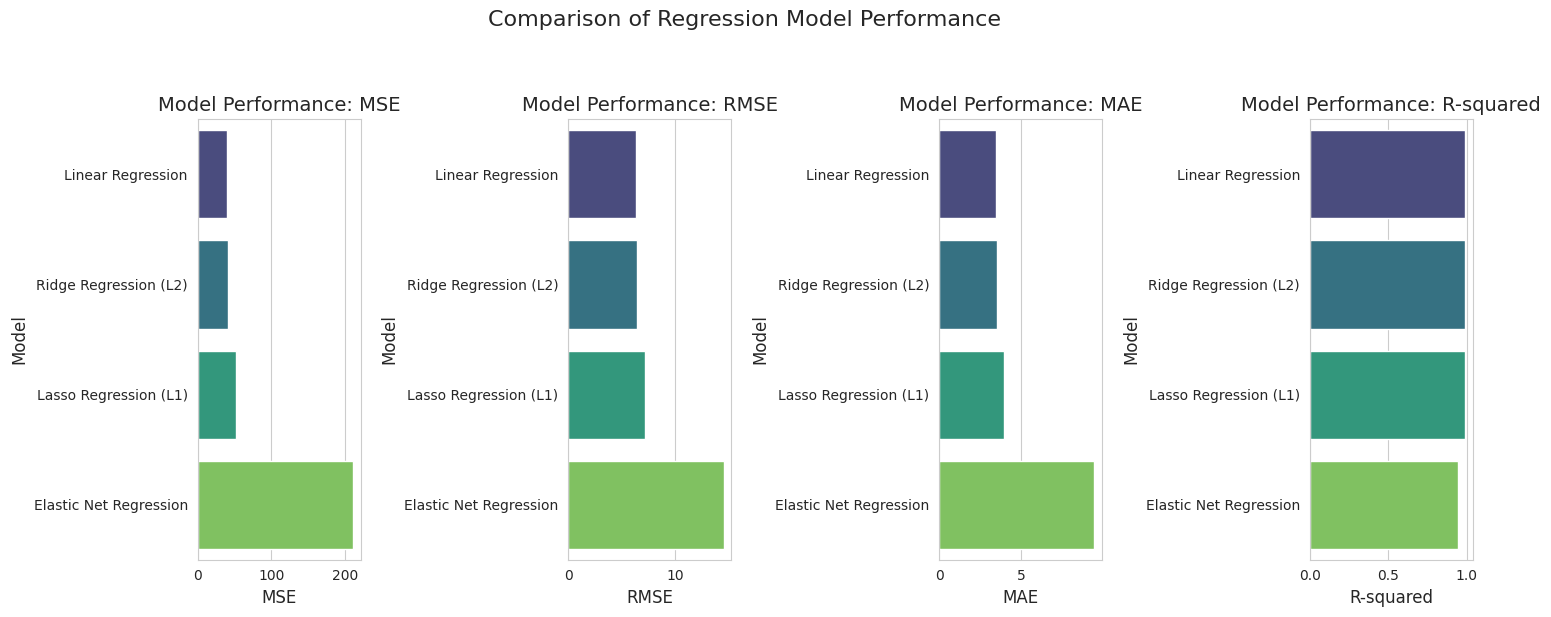


Final Model Scorecard (Textual):
                    Model         MSE       RMSE       MAE  R-squared
0       Linear Regression   40.005948   6.325026  3.494043   0.988982
1   Ridge Regression (L2)   40.766851   6.384892  3.563365   0.988772
2   Lasso Regression (L1)   51.626830   7.185181  3.976397   0.985781
3  Elastic Net Regression  211.023218  14.526638  9.469020   0.941880


In [26]:
# Set a visually appealing style
sns.set_style("whitegrid")

# Melt the scorecard for easier plotting
scorecard_melted = scorecard.melt(
    id_vars='Model',
    value_vars=['MSE', 'RMSE', 'MAE', 'R-squared'],
    var_name='Metric',
    value_name='Value'
)

# Create a figure with subplots for each metric
num_metrics = scorecard_melted['Metric'].nunique()
fig, axes = plt.subplots(1, num_metrics, figsize=(15, 6), sharey=False)
plt.subplots_adjust(wspace=0.4)

# Iterate through each metric and create a bar plot
for i, metric in enumerate(scorecard_melted['Metric'].unique()):
    subset = scorecard_melted[scorecard_melted['Metric'] == metric]
    ax = axes[i]
    sns.barplot(x='Value', y='Model', data=subset, ax=ax, palette='viridis')
    ax.set_title(f'Model Performance: {metric}', fontsize=14)
    ax.set_xlabel(metric, fontsize=12)
    ax.set_ylabel('Model', fontsize=12)
    ax.tick_params(axis='y', labelsize=10)

# Add an overall title to the figure
fig.suptitle('Comparison of Regression Model Performance', fontsize=16, y=1.02)

# Show the plot
plt.tight_layout(rect=[0, 0, 1, 0.96]) # Adjust layout to prevent title overlap
plt.show()

print("\nFinal Model Scorecard (Textual):")
print(scorecard.sort_values(by='RMSE')) # Sort by RMSE for a common error metric

Elastic Net Regression may need a little bit tuning but as for now The Linear Regression Model shows the best performance.

# Exporting the model 

In [28]:
joblib.dump(linear_model, 'co2_emission_model.pkl')

['co2_emission_model.pkl']

We will also need to export our PowerTransformer and the StandardScaler

In [31]:
scaler = joblib.dump(scaler, 'scaler.pkl')
power_transformer = joblib.dump(pt, 'power_transformer.pkl')

In [33]:
X_train.columns

Index(['Cylinders', 'Fuel_Consumption_Comb_L_per_100km', 'Transmission_A4',
       'Transmission_A5', 'Transmission_A6', 'Transmission_A7',
       'Transmission_A8', 'Transmission_A9', 'Transmission_AM6',
       'Transmission_AM7', 'Transmission_AM8', 'Transmission_AS10',
       'Transmission_AS5', 'Transmission_AS6', 'Transmission_AS7',
       'Transmission_AS8', 'Transmission_AS9', 'Transmission_AV',
       'Transmission_AV6', 'Transmission_AV7', 'Transmission_AV8',
       'Transmission_M5', 'Transmission_M6', 'Transmission_M7', 'Fuel_Type_E',
       'Fuel_Type_X', 'Fuel_Type_Z', 'Engine_Size_L'],
      dtype='object')

In [34]:
model_columns = X_train.columns

In [37]:
joblib.dump(model_columns, 'model_columns.pkl')

['model_columns.pkl']